<a href="https://colab.research.google.com/github/mekaviari37/audio_analyzer_assemblyai/blob/main/speech_indo_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I tried transcribing the Indonesian language using the API, but it cannot interpret the language correctly.

In [3]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.7 MB/s eta 0:00:00


In [4]:
import requests
from IPython.display import JSON
import pandas as pd
import numpy as np
import time

# Visualization
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# Panel/hvplot (holoviz)
import panel as pn
pn.extension()
import param
import hvplot.pandas

# Others
import pickle
from io import StringIO

In [5]:
API_KEY = "xxx"

In [6]:
# Submitting Files for Transcription
import requests
endpoint = "https://api.assemblyai.com/v2/transcript"
json = {
    "audio_url": "https://github.com/mekaviari37/audio_analyzer_assemblyai/blob/main/Saran Investasi Yang Aman Dong Mas.mp3?raw=true",
    "auto_highlights": True,
    "sentiment_analysis": True,
    "auto_chapters": True,
    "iab_categories": True,
}
headers = {
    "authorization": API_KEY,
    "content-type": "application/json"
}
response = requests.post(endpoint, json=json, headers=headers)
print(response.json())

{'id': '60eifhfjjr-85d7-49e5-b83d-bc5c81be7e45', 'language_model': 'assemblyai_default', 'acoustic_model': 'assemblyai_default', 'language_code': 'en_us', 'status': 'queued', 'audio_url': 'https://github.com/mekaviari37/audio_analyzer_assemblyai/blob/main/Saran Investasi Yang Aman Dong Mas.mp3?raw=true', 'text': None, 'words': None, 'utterances': None, 'confidence': None, 'audio_duration': None, 'punctuate': True, 'format_text': True, 'dual_channel': None, 'webhook_url': None, 'webhook_status_code': None, 'webhook_auth': False, 'webhook_auth_header_name': None, 'speed_boost': False, 'auto_highlights_result': None, 'auto_highlights': True, 'audio_start_from': None, 'audio_end_at': None, 'word_boost': [], 'boost_param': None, 'filter_profanity': False, 'redact_pii': False, 'redact_pii_audio': False, 'redact_pii_audio_quality': None, 'redact_pii_policies': None, 'redact_pii_sub': None, 'speaker_labels': False, 'content_safety': False, 'iab_categories': True, 'content_safety_labels': {}, '

In [7]:
# Getting the Transcription Result
result_endpoint = endpoint + "/" + response.json()["id"]
headers_auth = {
    "authorization": API_KEY,
}
transcript_response = requests.get(result_endpoint, headers=headers_auth)
print(transcript_response.json())

# While loop for requesting transcription
while response.json()['status'] != "completed":
    response = requests.get(result_endpoint, headers=headers_auth)
    time.sleep(3)

{'id': '60eifhfjjr-85d7-49e5-b83d-bc5c81be7e45', 'language_model': 'assemblyai_default', 'acoustic_model': 'assemblyai_default', 'language_code': 'en_us', 'status': 'completed', 'audio_url': 'https://github.com/mekaviari37/audio_analyzer_assemblyai/blob/main/Saran Investasi Yang Aman Dong Mas.mp3?raw=true', 'text': "Of Marikita prajalas de Phoenici Amandulu Monroe amber Dama Bukham ponzi Bukhan skim bukhamani game atosi Yankatiga Kamunkina Kalalores Yalorita and Ta P Monroe Haniyang yeah, indonesia simply mathem obligacy passer secondary Passar secondary fixed rate in the product coupon atobungy bicycle minimatrosimasuka minimal work to get obligated manualiya ibu Men Ko So Pawandra Jacob Bike Namanya Soko but Sato DA Dua boom patawan Atomandaman bisa pilisandiri observer deposito bangbiasa then deposito pepper per hari Nikki Ito lima percentahunga bangbiasa minimal deposito. Guys. Al Pasatal, baghapanjamin Simpana sampai nilai dua milasaba coloro dilima deposito among El Pas in case m

In [8]:
JSON(transcript_response.json())

<IPython.core.display.JSON object>

In [9]:
# Save pickle
with open('speech_data_indo.pkl', 'wb') as f:
    pickle.dump(transcript_response.json().copy(), f)

## Dashboard components

In [10]:
# Load data pickle
with open('speech_data_indo.pkl', 'rb') as f:
    data = pickle.load(f)

In [11]:
print(data)

{'id': '60eifhfjjr-85d7-49e5-b83d-bc5c81be7e45', 'language_model': 'assemblyai_default', 'acoustic_model': 'assemblyai_default', 'language_code': 'en_us', 'status': 'completed', 'audio_url': 'https://github.com/mekaviari37/audio_analyzer_assemblyai/blob/main/Saran Investasi Yang Aman Dong Mas.mp3?raw=true', 'text': "Of Marikita prajalas de Phoenici Amandulu Monroe amber Dama Bukham ponzi Bukhan skim bukhamani game atosi Yankatiga Kamunkina Kalalores Yalorita and Ta P Monroe Haniyang yeah, indonesia simply mathem obligacy passer secondary Passar secondary fixed rate in the product coupon atobungy bicycle minimatrosimasuka minimal work to get obligated manualiya ibu Men Ko So Pawandra Jacob Bike Namanya Soko but Sato DA Dua boom patawan Atomandaman bisa pilisandiri observer deposito bangbiasa then deposito pepper per hari Nikki Ito lima percentahunga bangbiasa minimal deposito. Guys. Al Pasatal, baghapanjamin Simpana sampai nilai dua milasaba coloro dilima deposito among El Pas in case m

### 0) Download transcript widget

In [12]:
# Create a StringIO buffer
buffer = StringIO()

# Check if data["text"] is not None before writing to the buffer
if data["text"] is not None:
    buffer.write(data["text"])
else:
    # Handle the case when data["text"] is None
    buffer.write("Default text")  # Replace "Default text" with your desired default value

buffer.seek(0)  # Move the buffer cursor to the beginning

0

In [13]:
transcript_download = pn.widgets.FileDownload(file=buffer,
                                              filename="transcript.txt",
                                              button_type='success')
transcript_download

FileDownload(button_type='success', file=<_io.StringIO o..., filename='transcript.txt', label='Download transcript.txt')

### 00) Audio play

In [14]:
audio_url = "https://github.com/mekaviari37/audio_analyzer_assemblyai/blob/main/Saran Investasi Yang Aman Dong Mas.mp3?raw=true"
audio_play = pn.pane.Audio(audio_url, name='Audio', time = 360)
audio_play

Audio(str, time=360)

### 1) Sentiment plot

In [15]:
sentiment = data["sentiment_analysis_results"]

In [16]:
sentiment_df = pd.DataFrame(sentiment)
sentiment_df

,text,start,end,sentiment,confidence,speaker
0,Of Marikita prajalas de Phoenici Amandulu Monr...,650,193270,NEUTRAL,0.874630,None
1,Guys.,195130,195880,NEUTRAL,0.665882,None
2,"Al Pasatal, baghapanjamin Simpana sampai nilai...",199970,223722,NEUTRAL,0.856548,None
3,Worst case scenario.,223786,224914,NEGATIVE,0.655756,None
4,"Ah, but yeah.",225002,229400,NEUTRAL,0.662067,None
5,Claim.,232570,233430,NEUTRAL,0.757471,None
6,Yeah.,234250,234566,NEUTRAL,0.549145,None
7,So padraski Halaman website LPAs and Kisuritan...,234588,244550,NEUTRAL,0.895824,None
8,Hope not.,245050,246120,NEUTRAL,0.625053,None
9,Tindakanikata Bisanglihat.,250050,255546,NEUTRAL,0.733657,None


In [17]:
sentiment_df_grouped = sentiment_df['sentiment'].value_counts()
sentiment_df_grouped

NEUTRAL     14
NEGATIVE     1
Name: sentiment, dtype: int64

In [18]:
# Bar plot
sentiment_plot = sentiment_df_grouped.hvplot(title = "Sentences by Sentiment Category", kind="bar")
pn.Row(sentiment_plot)

Row
    [0] HoloViews(Bars, height=300, sizing_mode='fixed', width=700)

In [19]:
positive_df = sentiment_df[sentiment_df["sentiment"] == "POSITIVE"][["text", "sentiment"]]
negative_df = sentiment_df[sentiment_df["sentiment"] == "NEGATIVE"][["text", "sentiment"]]
neutral_df = sentiment_df[sentiment_df["sentiment"] == "NEUTRAL"][["text", "sentiment"]]

sentiment_tabs = pn.Tabs(('Sentiment overview', sentiment_plot),
                       ('Positive', pn.widgets.DataFrame(positive_df, autosize_mode='fit_columns', width=700, height=300)),
                       ('Negative', pn.widgets.DataFrame(negative_df, autosize_mode='fit_columns', width=700, height=300)),
                       ('Neutral', pn.widgets.DataFrame(neutral_df, autosize_mode='fit_columns', width=700, height=300))
                        )
sentiment_tabs

Tabs
    [0] HoloViews(Bars, height=300, name='Sentiment overview', sizing_mode='fixed', width=700)
    [1] DataFrame(autosize_mode='fit_columns', height=300, sizing_mode='fixed', value=Empty DataFrame
Columns: [..., width=700)
    [2] DataFrame(autosize_mode='fit_columns', height=300, sizing_mode='fixed', value=              ..., width=700)
    [3] DataFrame(autosize_mode='fit_columns', height=300, sizing_mode='fixed', value=                          ..., width=700)

## 2) Word cloud

In [20]:
stopwords = set(STOPWORDS)

In [21]:
transcript = data["text"]

In [22]:
transcript_lower = [item.lower() for item in str(transcript).split()]
transcript_lower

['of',
 'marikita',
 'prajalas',
 'de',
 'phoenici',
 'amandulu',
 'monroe',
 'amber',
 'dama',
 'bukham',
 'ponzi',
 'bukhan',
 'skim',
 'bukhamani',
 'game',
 'atosi',
 'yankatiga',
 'kamunkina',
 'kalalores',
 'yalorita',
 'and',
 'ta',
 'p',
 'monroe',
 'haniyang',
 'yeah,',
 'indonesia',
 'simply',
 'mathem',
 'obligacy',
 'passer',
 'secondary',
 'passar',
 'secondary',
 'fixed',
 'rate',
 'in',
 'the',
 'product',
 'coupon',
 'atobungy',
 'bicycle',
 'minimatrosimasuka',
 'minimal',
 'work',
 'to',
 'get',
 'obligated',
 'manualiya',
 'ibu',
 'men',
 'ko',
 'so',
 'pawandra',
 'jacob',
 'bike',
 'namanya',
 'soko',
 'but',
 'sato',
 'da',
 'dua',
 'boom',
 'patawan',
 'atomandaman',
 'bisa',
 'pilisandiri',
 'observer',
 'deposito',
 'bangbiasa',
 'then',
 'deposito',
 'pepper',
 'per',
 'hari',
 'nikki',
 'ito',
 'lima',
 'percentahunga',
 'bangbiasa',
 'minimal',
 'deposito.',
 'guys.',
 'al',
 'pasatal,',
 'baghapanjamin',
 'simpana',
 'sampai',
 'nilai',
 'dua',
 'milasaba',

In [23]:
all_words = ' '.join(transcript_lower)
all_words

"of marikita prajalas de phoenici amandulu monroe amber dama bukham ponzi bukhan skim bukhamani game atosi yankatiga kamunkina kalalores yalorita and ta p monroe haniyang yeah, indonesia simply mathem obligacy passer secondary passar secondary fixed rate in the product coupon atobungy bicycle minimatrosimasuka minimal work to get obligated manualiya ibu men ko so pawandra jacob bike namanya soko but sato da dua boom patawan atomandaman bisa pilisandiri observer deposito bangbiasa then deposito pepper per hari nikki ito lima percentahunga bangbiasa minimal deposito. guys. al pasatal, baghapanjamin simpana sampai nilai dua milasaba coloro dilima deposito among el pas in case misala. worst case scenario. ah, but yeah. claim. yeah. so padraski halaman website lpas and kisuritan gohan. hope not. tindakanikata bisanglihat. bahua mitigation lagi adalas atu pasikani jaminol pass yang practice karana at the website kaya deposit of pepper yadal hasiyo investment guarizini fxuma oh yeah. satullag


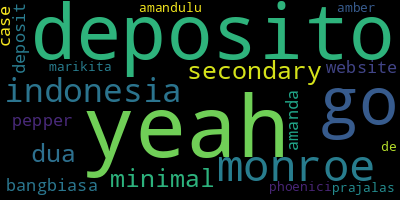

In [24]:
# Word cloud plot
wordcloud = WordCloud(background_color='black', stopwords = stopwords, max_words = 20,
                      colormap='viridis', collocations=False).generate(all_words)

wordcloud_plot = px.imshow(wordcloud)
# Remove labels on axes
wordcloud_plot.update_xaxes(showticklabels=False)
wordcloud_plot.update_yaxes(showticklabels=False)
wordcloud_plot

In [25]:
# Create interactive slider
class Controller(param.Parameterized):
    word_slider = param.Integer(30, bounds=(5, 50), step=5)

controller = Controller()

@pn.depends(controller.param.word_slider, watch=True)
def update_wordcloud(num_words):
    # Word cloud plot
    wordcloud = WordCloud(background_color='black', stopwords = stopwords, max_words = num_words,
                          colormap='viridis', collocations=False).generate(all_words)

    wordcloud_plot = px.imshow(wordcloud)
    # Remove labels on axes
    wordcloud_plot.update_xaxes(showticklabels=False)
    wordcloud_plot.update_yaxes(showticklabels=False)
    return wordcloud_plot

### 3) Auto chapter summary

In [26]:
chapters = data["chapters"]
chapters

[{'summary': 'Indonesia simply mathem obligacy passer secondary Passar secondary fixed rate in the product coupon. So padraski Halaman website LPAs and Kisuritan gohan. Worst case scenario. Hope not.',
  'gist': 'Negligacy Deposit',
  'headline': 'Indonesia simply mathem obligacy passer secondary fixed rate in product coupon',
  'start': 650,
  'end': 463610}]

In [27]:
chapter_summary = pn.widgets.StaticText(value=chapters[0]["summary"],
                                        width=1000,
                                        height_policy = "fit")
chapter_summary

StaticText(height_policy='fit', value='Indonesia simply m..., width=1000)

In [28]:
button = pn.widgets.Button(name=str(int(chapters[0]["start"]/1000)), button_type='primary')
button

Button(button_type='primary', name='0')

In [29]:
chapter_audio = pn.pane.Audio(audio_url, name='Audio', time = round(chapters[0]["start"]/1000))
chapter_audio

Audio(str, time=1)

In [30]:
# Create chapter summary layout
chapters_layout = pn.Column(pn.pane.Markdown("### Auto Chapter Summary"))

class ButtonAudio():
    def __init__(self, start_time):
        self.start_time = start_time
        self.button = pn.widgets.Button(name=str(int(self.start_time/1000)), button_type='primary', width=60)
        self.chapter_audio = pn.pane.Audio(audio_url, name='Audio', time = round(self.start_time/1000))
        self.button.on_click(self.move_audio_head)

    def move_audio_head(self, event):
        self.chapter_audio.time = self.start_time/1000

for chapter in chapters:
    chapter_summary = pn.widgets.StaticText(value=chapter["summary"], width=1000, height_policy = "fit")
    button_audio = ButtonAudio(chapter["start"])
    button = button_audio.button
    chapter_audio = button_audio.chapter_audio
    chapters_layout.append(pn.Row(pn.Column(button), pn.Column(chapter_audio), pn.Column(chapter_summary)))

chapters_layout

Column
    [0] Markdown(str)
    [1] Row
        [0] Column
            [0] Button(button_type='primary', name='0', width=60)
        [1] Column
            [0] Audio(str, time=1)
        [2] Column
            [0] StaticText(height_policy='fit', value='Indonesia simply m..., width=1000)

### 4) Auto highlights

In [31]:
highlights = data["auto_highlights_result"]["results"]
highlights_df = pd.DataFrame(highlights)
highlights_df

,count,rank,text,timestamps
0,1,0.07,hari Nikki Ito lima percentahunga bangbiasa mi...,"[{'start': 174452, 'end': 193270}]"
1,1,0.07,baghapanjamin Simpana sampai nilai dua milasab...,"[{'start': 200778, 'end': 214110}]"
2,1,0.07,Basi Channel Guadam Papalo Video Exclusive Mem...,"[{'start': 400370, 'end': 425026}]"
3,1,0.07,Marikita prajalas de Phoenici Amandulu Monroe ...,"[{'start': 1970, 'end': 8938}]"
4,1,0.07,deposito bangbiasa,"[{'start': 168610, 'end': 169818}]"
5,1,0.07,Tilani goblajar photo graphi Sambil,"[{'start': 370474, 'end': 385666}]"
6,1,0.07,Isalia punya pencion pasti naani chocolate gua...,"[{'start': 318122, 'end': 325586}]"
7,1,0.06,secondary Passar secondary fixed rate,"[{'start': 57354, 'end': 68942}]"
8,1,0.06,Bahua mitigation lagi adalas atu,"[{'start': 255578, 'end': 261354}]"
9,1,0.06,Bukhan skim bukhamani game,"[{'start': 9274, 'end': 10574}]"


In [32]:
highlights_df_grouped = highlights_df.groupby(["count", "rank"])['text'].apply(", \n".join).reset_index()
highlights_df_grouped

,count,rank,text
0,1,0.06,"secondary Passar secondary fixed rate, \nBahua..."
1,1,0.07,hari Nikki Ito lima percentahunga bangbiasa mi...


In [33]:
# Scatter plot
highlights_plot = highlights_df_grouped.hvplot.points(x="count", y="rank",
                                                      padding=0.4, hover_cols="all",
                                                      width=1300, height=600,
                                                      size=50, title="Automatic Highlighted Words") *\
highlights_df_grouped.hvplot.labels(x="count", y="rank",
                                    text="text", text_baseline="top",
                                    hover=False).opts(fontscale=1.5)

pn.Row(highlights_plot)

Row
    [0] HoloViews(Overlay, height=600, sizing_mode='fixed', width=1300)

## Dashboard

In [35]:
# # Template for Dashboard